# Loading & Initial Data Processing


In [16]:
!pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Load Dataset

In [17]:
# Load datasets
daily_data = pd.read_csv('SamsungStockPrice/005930.KS.csv')
monthly_data = pd.read_csv('SamsungStockPrice/005930.KS_monthly.csv')
weekly_data = pd.read_csv('SamsungStockPrice/005930.KS_weekly.csv')

Convert date to datetime format

In [3]:
daily_data['Date'] = pd.to_datetime(daily_data['Date'])
monthly_data['Date'] = pd.to_datetime(monthly_data['Date'])
weekly_data['Date'] = pd.to_datetime(weekly_data['Date'])

Display initial information

In [4]:
print(daily_data.info())
print(monthly_data.info())
print(weekly_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413 entries, 0 to 1412
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1413 non-null   datetime64[ns]
 1   Open       1413 non-null   float64       
 2   High       1413 non-null   float64       
 3   Low        1413 non-null   float64       
 4   Close      1413 non-null   float64       
 5   Adj Close  1413 non-null   float64       
 6   Volume     1413 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 77.4 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       70 non-null     datetime64[ns]
 1   Open       70 non-null     float64       
 2   High       70 non-null     float64       
 3   Low        70 non-null     float64       
 4   Close  

# Data Cleaning

 Missing Values Handling

In [5]:
# Check for missing values
print(daily_data.isnull().sum())
daily_data = daily_data.fillna(method='ffill')

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


<ipython-input-5-0d62d4a8386e>:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  daily_data = daily_data.fillna(method='ffill')


 Outliers Detection and Removal

In [8]:
# Using IQR method to detect outliers
Q1 = daily_data['Close'].quantile(0.25)
Q3 = daily_data['Close'].quantile(0.75)
IQR = Q3 - Q1
outliers = daily_data[(daily_data['Close'] < (Q1 - 1.5 * IQR)) | (daily_data['Close'] > (Q3 + 1.5 * IQR))]
print(outliers)
daily_data = daily_data.drop(outliers.index)
print(daily_data)
daily_data.to_csv('daily_data_without_outliers.csv')

Empty DataFrame
Columns: [Date, Open, High, Low, Close, Adj Close, Volume]
Index: []
           Date     Open     High      Low    Close     Adj Close    Volume
0    2019-01-02  39400.0  39400.0  38550.0  38750.0  33474.054688   7847664
1    2019-01-03  38300.0  38550.0  37450.0  37600.0  32480.628906  12471493
2    2019-01-04  37450.0  37600.0  36850.0  37450.0  32351.048828  14108958
3    2019-01-07  38000.0  38900.0  37800.0  38750.0  33474.054688  12748997
4    2019-01-08  38000.0  39200.0  37950.0  38100.0  32912.558594  12756554
...         ...      ...      ...      ...      ...           ...       ...
1408 2024-09-23  62300.0  63500.0  62200.0  62600.0  62600.000000  28542376
1409 2024-09-24  62800.0  63400.0  62400.0  63200.0  63200.000000  26957500
1410 2024-09-25  63800.0  64200.0  62200.0  62200.0  62200.000000  28652438
1411 2024-09-26  63900.0  64900.0  63700.0  64700.0  64700.000000  37566015
1412 2024-09-27  64700.0  65400.0  64200.0  64200.0  64200.000000  28433030

[1

# Exploratory Data Analysis (EDA)

Time Series Plotting & Patterns


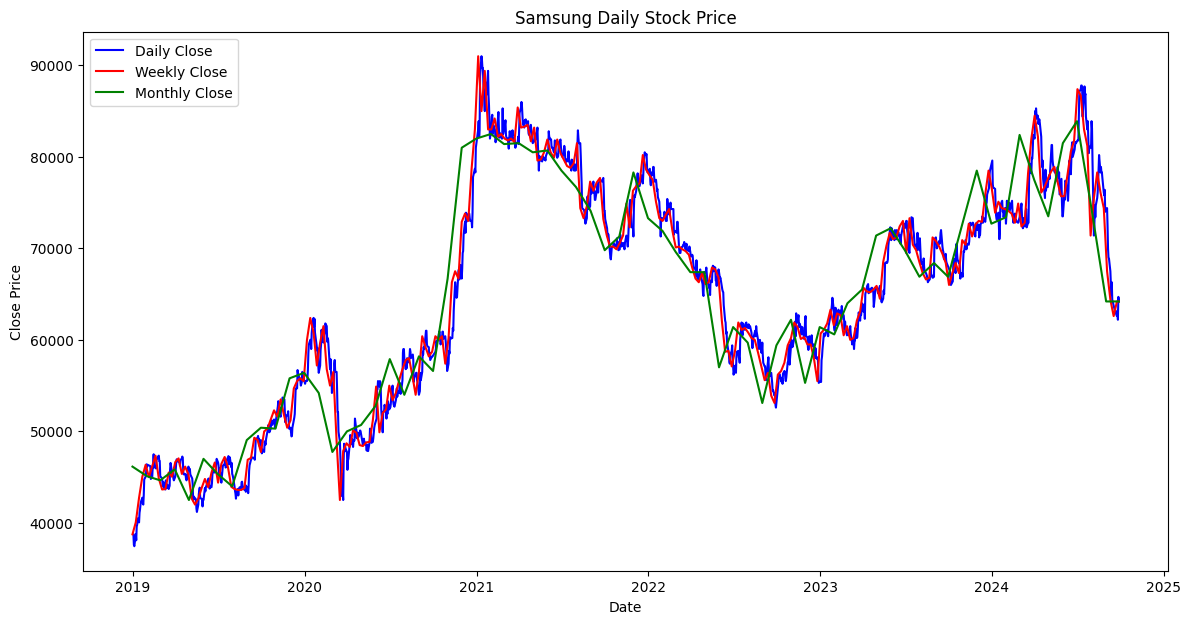

In [13]:
import matplotlib.pyplot as plt

# Plot Daily Closing Price
plt.figure(figsize=(14,7))
plt.plot(daily_data['Date'], daily_data['Close'], label='Daily Close', color='blue')
plt.plot(weekly_data['Date'], weekly_data['Close'], label='Weekly Close', color='red')
plt.plot(monthly_data['Date'], monthly_data['Close'], label='Monthly Close', color='green')
plt.title('Samsung Daily Stock Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

Volatility Analysis

In [14]:
# Calculating daily returns for volatility analysis
daily_data['Daily Return'] = daily_data['Close'].pct_change()
print(daily_data)

# Volatility (standard deviation of returns)
volatility = daily_data['Daily Return'].std() * (252 ** 0.5)
print(f'Annualized Volatility: {volatility}')


           Date     Open     High      Low    Close     Adj Close    Volume  \
0    2019-01-02  39400.0  39400.0  38550.0  38750.0  33474.054688   7847664   
1    2019-01-03  38300.0  38550.0  37450.0  37600.0  32480.628906  12471493   
2    2019-01-04  37450.0  37600.0  36850.0  37450.0  32351.048828  14108958   
3    2019-01-07  38000.0  38900.0  37800.0  38750.0  33474.054688  12748997   
4    2019-01-08  38000.0  39200.0  37950.0  38100.0  32912.558594  12756554   
...         ...      ...      ...      ...      ...           ...       ...   
1408 2024-09-23  62300.0  63500.0  62200.0  62600.0  62600.000000  28542376   
1409 2024-09-24  62800.0  63400.0  62400.0  63200.0  63200.000000  26957500   
1410 2024-09-25  63800.0  64200.0  62200.0  62200.0  62200.000000  28652438   
1411 2024-09-26  63900.0  64900.0  63700.0  64700.0  64700.000000  37566015   
1412 2024-09-27  64700.0  65400.0  64200.0  64200.0  64200.000000  28433030   

      Daily Return  
0              NaN  
1        

 Correlation Analysis


In [24]:
# Calculate correlation matrix, only including numeric columns
corr_matrix = daily_data.select_dtypes(include=['number']).corr()
print(corr_matrix)

            Unnamed: 0      Open      High       Low     Close  Adj Close  \
Unnamed: 0    1.000000  0.634800  0.632543  0.634602  0.632828   0.737335   
Open          0.634800  1.000000  0.998815  0.999096  0.997715   0.987637   
High          0.632543  0.998815  1.000000  0.998676  0.998992   0.988270   
Low           0.634602  0.999096  0.998676  1.000000  0.998961   0.988640   
Close         0.632828  0.997715  0.998992  0.998961  1.000000   0.989215   
Adj Close     0.737335  0.987637  0.988270  0.988640  0.989215   1.000000   
Volume        0.047365  0.209567  0.230068  0.196466  0.212835   0.190663   

              Volume  
Unnamed: 0  0.047365  
Open        0.209567  
High        0.230068  
Low         0.196466  
Close       0.212835  
Adj Close   0.190663  
Volume      1.000000  


 Rolling Statistics


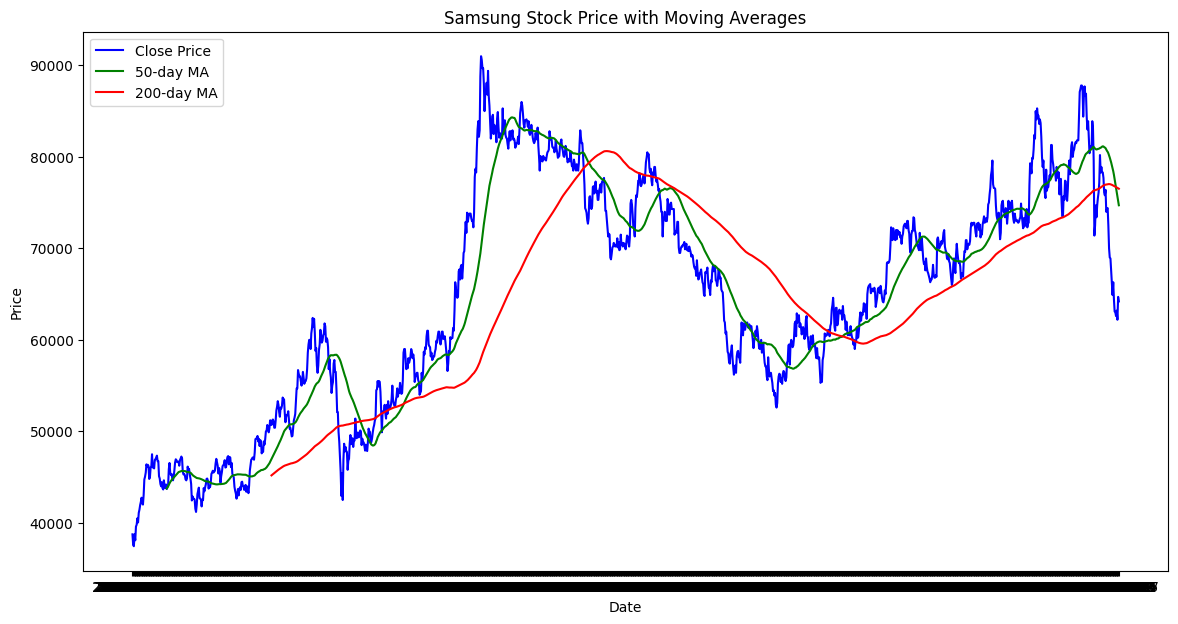

In [27]:
daily_data['SMA_50'] = daily_data['Close'].rolling(window=50).mean()
daily_data['SMA_200'] = daily_data['Close'].rolling(window=200).mean()

# Plot moving averages
plt.figure(figsize=(14,7))
plt.plot(daily_data['Date'], daily_data['Close'], label='Close Price', color='blue')
plt.plot(daily_data['Date'], daily_data['SMA_50'], label='50-day MA', color='green')
plt.plot(daily_data['Date'], daily_data['SMA_200'], label='200-day MA', color='red')
plt.title('Samsung Stock Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


#Feature Engineering

Relative Strength Index (RSI)

In [29]:
def calculate_rsi(data, window):
    delta = data['Close'].diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

daily_data['RSI'] = calculate_rsi(daily_data, window=14)
daily_data.dropna(inplace=True)
print(daily_data)

      Unnamed: 0        Date     Open     High      Low    Close  \
199          199  2019-10-24  52500.0  52500.0  50500.0  50700.0   
200          200  2019-10-25  50800.0  51200.0  50500.0  50900.0   
201          201  2019-10-28  50700.0  51500.0  50700.0  51300.0   
202          202  2019-10-29  51400.0  51700.0  50800.0  51100.0   
203          203  2019-10-30  50700.0  50800.0  50200.0  50400.0   
...          ...         ...      ...      ...      ...      ...   
1408        1408  2024-09-23  62300.0  63500.0  62200.0  62600.0   
1409        1409  2024-09-24  62800.0  63400.0  62400.0  63200.0   
1410        1410  2024-09-25  63800.0  64200.0  62200.0  62200.0   
1411        1411  2024-09-26  63900.0  64900.0  63700.0  64700.0   
1412        1412  2024-09-27  64700.0  65400.0  64200.0  64200.0   

         Adj Close    Volume   SMA_50   SMA_200        RSI  
199   44808.593750  21185785  46984.0  45192.75  72.463768  
200   44985.343750   7879897  47139.0  45253.50  71.641791  


 Moving Average Convergence Divergence (MACD)

In [35]:
daily_data['EMA_12'] = daily_data['Close'].ewm(span=12, adjust=False).mean()
daily_data['EMA_26'] = daily_data['Close'].ewm(span=26, adjust=False).mean()
daily_data['MACD'] = daily_data['EMA_12'] - daily_data['EMA_26']
daily_data['Signal'] = daily_data['MACD'].ewm(span=9, adjust=False).mean()
daily_data['Histogram'] = daily_data['MACD'] - daily_data['Signal']
daily_data.dropna(inplace=True)
print(daily_data)

      Unnamed: 0        Date     Open     High      Low    Close  \
199          199  2019-10-24  52500.0  52500.0  50500.0  50700.0   
200          200  2019-10-25  50800.0  51200.0  50500.0  50900.0   
201          201  2019-10-28  50700.0  51500.0  50700.0  51300.0   
202          202  2019-10-29  51400.0  51700.0  50800.0  51100.0   
203          203  2019-10-30  50700.0  50800.0  50200.0  50400.0   
...          ...         ...      ...      ...      ...      ...   
1408        1408  2024-09-23  62300.0  63500.0  62200.0  62600.0   
1409        1409  2024-09-24  62800.0  63400.0  62400.0  63200.0   
1410        1410  2024-09-25  63800.0  64200.0  62200.0  62200.0   
1411        1411  2024-09-26  63900.0  64900.0  63700.0  64700.0   
1412        1412  2024-09-27  64700.0  65400.0  64200.0  64200.0   

         Adj Close    Volume   SMA_50   SMA_200        RSI        EMA_12  \
199   44808.593750  21185785  46984.0  45192.75  72.463768  50700.000000   
200   44985.343750   7879897  4

Bollinger Bands

In [36]:
daily_data['stddev'] = daily_data['Close'].rolling(window=20).std()
daily_data['Upper Band'] = daily_data['SMA_50'] + (daily_data['stddev'] * 2)
daily_data['Lower Band'] = daily_data['SMA_50'] - (daily_data['stddev'] * 2)
daily_data.dropna(inplace=True)
print(daily_data)

      Unnamed: 0        Date     Open     High      Low    Close  \
218          218  2019-11-20  53400.0  53400.0  52000.0  52000.0   
219          219  2019-11-21  51600.0  52100.0  50600.0  51000.0   
220          220  2019-11-22  51000.0  51600.0  50900.0  51600.0   
221          221  2019-11-25  52200.0  52600.0  51700.0  51800.0   
222          222  2019-11-26  51900.0  52900.0  51800.0  51800.0   
...          ...         ...      ...      ...      ...      ...   
1408        1408  2024-09-23  62300.0  63500.0  62200.0  62600.0   
1409        1409  2024-09-24  62800.0  63400.0  62400.0  63200.0   
1410        1410  2024-09-25  63800.0  64200.0  62200.0  62200.0   
1411        1411  2024-09-26  63900.0  64900.0  63700.0  64700.0   
1412        1412  2024-09-27  64700.0  65400.0  64200.0  64200.0   

         Adj Close    Volume   SMA_50   SMA_200        RSI        EMA_12  \
218   45957.531250  12560070  50119.0  46261.00  59.302326  52589.521247   
219   45073.726562  14298646  5

#Time Series Modeling & Forecasting

 Train-Test Split


In [39]:
train_size = int(len(daily_data) * 0.8)
train_data, test_data = daily_data[:train_size], daily_data[train_size:]
print(len(train_data), len(test_data))
print(train_data.iloc[0])
print(test_data.iloc[0])
print(train_data.iloc[-1])
print(test_data.iloc[-1])

956 239
Unnamed: 0             218
Date            2019-11-20
Open               53400.0
High               53400.0
Low                52000.0
Close              52000.0
Adj Close      45957.53125
Volume            12560070
SMA_50             50119.0
SMA_200            46261.0
RSI              59.302326
EMA_12        52589.521247
EMA_26        52036.014413
MACD            553.506834
Signal          515.143198
Histogram        38.363637
stddev         1069.616262
Upper Band    52258.232523
Lower Band    47979.767477
Name: 218, dtype: object
Unnamed: 0            1174
Date            2023-10-10
Open               66200.0
High               67600.0
Low                66200.0
Close              66400.0
Adj Close     65495.976562
Volume            19889202
SMA_50             68816.0
SMA_200            65847.5
RSI              24.137931
EMA_12        68017.598901
EMA_26        68680.098265
MACD           -662.499365
Signal         -192.150667
Histogram      -470.348698
stddev         1687.87

ARIMA Model for Time Series Prediction

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  956
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -7973.826
Date:                Sun, 29 Sep 2024   AIC                          15959.651
Time:                        10:23:51   BIC                          15988.821
Sample:                             0   HQIC                         15970.763
                                - 956                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0072      0.023     -0.307      0.759      -0.053       0.039
ar.L2         -0.0084      0.026     -0.326      0.744      -0.059       0.042
ar.L3          0.0077      0.030      0.253      0.8

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


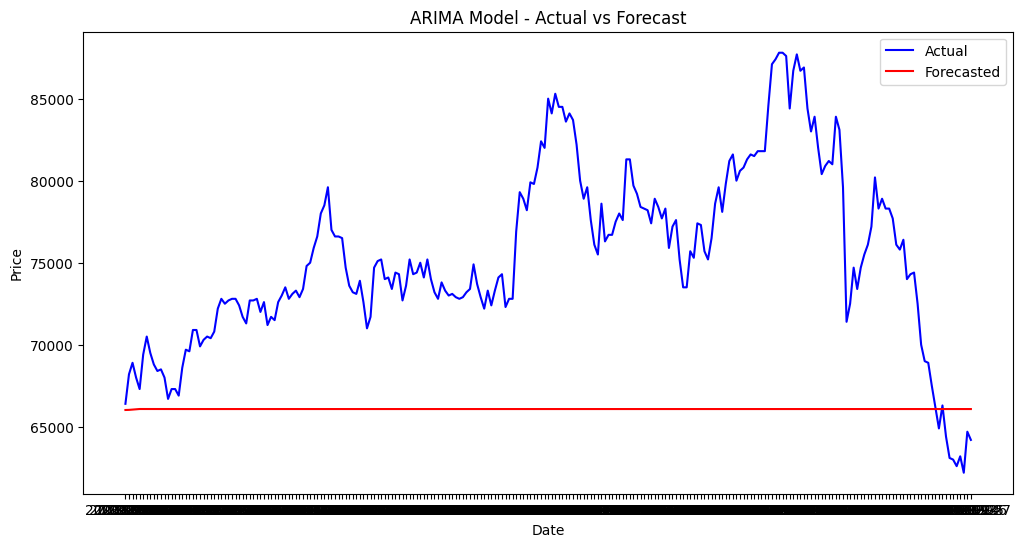

In [40]:
from statsmodels.tsa.arima.model import ARIMA

# Train ARIMA model
model = ARIMA(train_data['Close'], order=(5,1,0))
model_fit = model.fit()
print(model_fit.summary())

# Forecast the test data
forecast = model_fit.forecast(steps=len(test_data))
plt.figure(figsize=(12,6))
plt.plot(test_data['Date'], test_data['Close'], label='Actual', color='blue')
plt.plot(test_data['Date'], forecast, label='Forecasted', color='red')
plt.title('ARIMA Model - Actual vs Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

 LSTM Model for Sequential Data

In [42]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import yfinance as yf

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(daily_data[['Close']])
print(scaled_data)

# Preparing data for LSTM
def create_dataset(data, time_step=1):
    X, Y = [], []
    for i in range(len(data)-time_step-1):
        X.append(data[i:(i+time_step), 0])
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 100
X, Y = create_dataset(scaled_data, time_step)
X = X.reshape(X.shape[0], X.shape[1], 1)

# Build LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.summary()
model.compile(optimizer='adam', loss='mean_squared_error')

# Train model
model.fit(X, Y, epochs=10, batch_size=64)

[[0.19587629]
 [0.17525773]
 [0.18762887]
 ...
 [0.40618557]
 [0.45773196]
 [0.44742268]]


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 100, 50)             │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 139ms/step - loss: 0.1281
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 137ms/step - loss: 0.0104
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 148ms/step - loss: 0.0062
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 139ms/step - loss: 0.0041
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 137ms/step - loss: 0.0040
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 137ms/step - loss: 0.0038
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 171ms/step - loss: 0.0037
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 142ms/step - loss: 0.0031
Epoch 9/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 139ms/step - loss: 0.0036
Epoch 10/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 178ms/step - loss: 0.0032


#Model Evaluation


In [43]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(test_data['Close'], forecast)
mae = mean_absolute_error(test_data['Close'], forecast)
rmse = np.sqrt(mse)

print(f'MSE: {mse}, MAE: {mae}, RMSE: {rmse}')

MSE: 116991363.53874785, MAE: 9576.431417622229, RMSE: 10816.254598461885


#Advanced Reporting

Tren dan Insights Utama

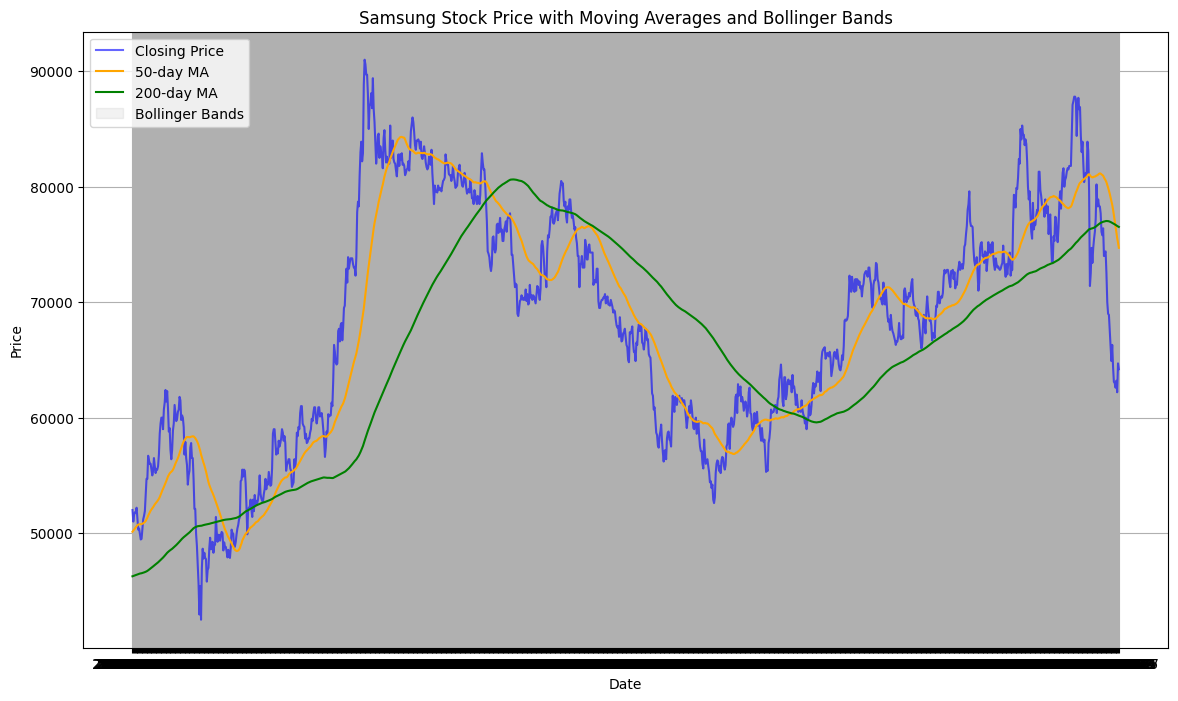

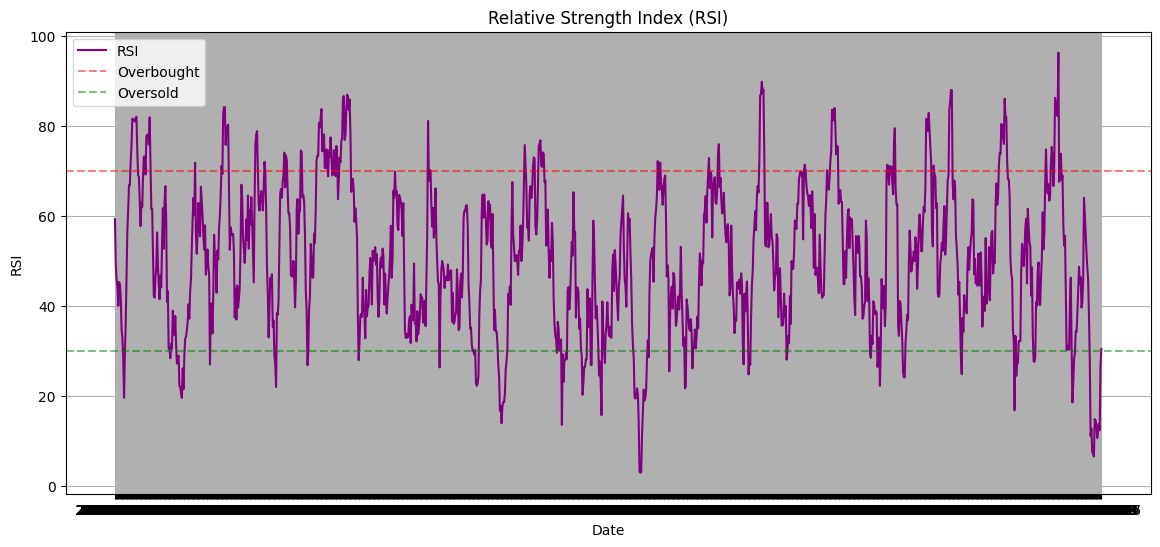

In [47]:
import matplotlib.pyplot as plt

# Plot closing price with moving averages
plt.figure(figsize=(14,8))
plt.plot(daily_data['Date'], daily_data['Close'], label='Closing Price', color='blue', alpha=0.6)
plt.plot(daily_data['Date'], daily_data['SMA_50'], label='50-day MA', color='orange')
plt.plot(daily_data['Date'], daily_data['SMA_200'], label='200-day MA', color='green')
plt.fill_between(daily_data['Date'], daily_data['Lower Band'], daily_data['Upper Band'], color='grey', alpha=0.1, label='Bollinger Bands')
plt.title('Samsung Stock Price with Moving Averages and Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

# Plot RSI
plt.figure(figsize=(14,6))
plt.plot(daily_data['Date'], daily_data['RSI'], label='RSI', color='purple')
plt.axhline(70, linestyle='--', alpha=0.5, color='red', label='Overbought')
plt.axhline(30, linestyle='--', alpha=0.5, color='green', label='Oversold')
plt.title('Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.grid()
plt.show()

Model Forecasting Performance


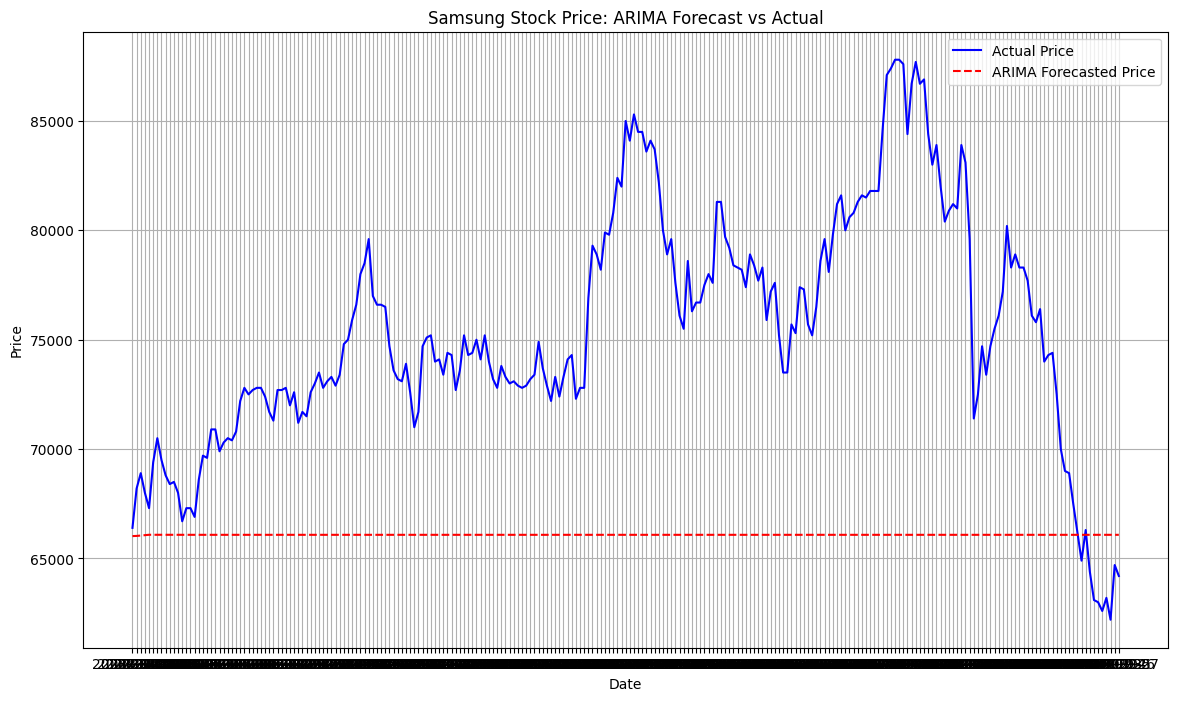

In [48]:
# Plot ARIMA Forecast vs Actual Prices
plt.figure(figsize=(14,8))
plt.plot(test_data['Date'], test_data['Close'], label='Actual Price', color='blue')
plt.plot(test_data['Date'], forecast, label='ARIMA Forecasted Price', color='red', linestyle='--')
plt.title('Samsung Stock Price: ARIMA Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


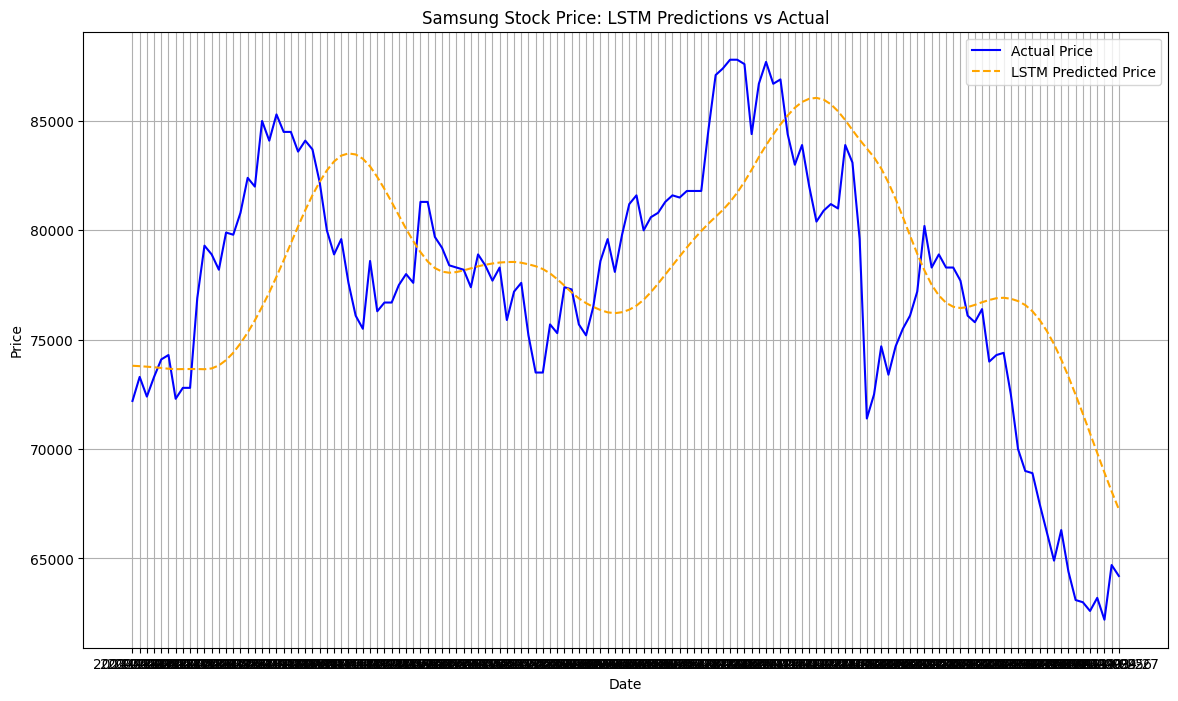

In [50]:
# Prepare test data for LSTM prediction
test_scaled = scaler.transform(test_data[['Close']])
X_test, Y_test = create_dataset(test_scaled, time_step)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Predict with LSTM model
lstm_predictions = model.predict(X_test)
lstm_predictions = scaler.inverse_transform(lstm_predictions)

# Plot LSTM Predictions vs Actual Prices
plt.figure(figsize=(14,8))

# Adjust the x-axis data to match the length of lstm_predictions
plt.plot(test_data['Date'][-len(lstm_predictions):], test_data['Close'][-len(lstm_predictions):], label='Actual Price', color='blue')
plt.plot(test_data['Date'][-len(lstm_predictions):], lstm_predictions, label='LSTM Predicted Price', color='orange', linestyle='--') # Assuming lstm_predictions is a 1D array

plt.title('Samsung Stock Price: LSTM Predictions vs Actual')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()
